In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Importing the data
here = pathlib.Path(os.path.abspath(''))
exercise_dir = here.parent
data_dir = exercise_dir.parent / "data"

titanic_df = pd.read_csv(data_dir / "titanic.csv")


Text(0.5, 0.98, 'Missing data distribution')

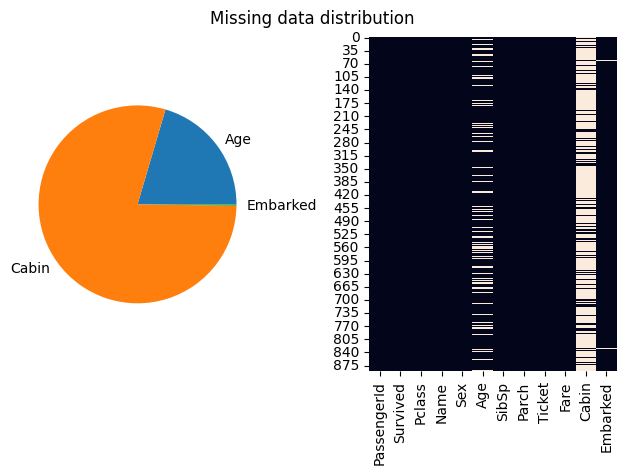

In [55]:
# find the missing data per categories
missing_data = titanic_df.isnull().sum()

missing_data = missing_data.where(missing_data > 0).dropna()

heatmap_df_bool = titanic_df.isnull()
heatmp_df = heatmap_df_bool.map(lambda x: int(x))

fig, axs = plt.subplots(1, 2)

sns.heatmap(titanic_df.isnull(), cbar=False).set_title(" ")
 
axs[0].pie(missing_data, labels=missing_data.index.to_list())

fig.tight_layout() #spacing between plots
fig.suptitle("Missing data distribution")

Is becomes obvious, that a lot of data is missing for the cabin and age of the passengers. Therefore analysis on these columns might not be significant. 

Text(0.5, 1.0, 'Correlation between Sex and death rate')

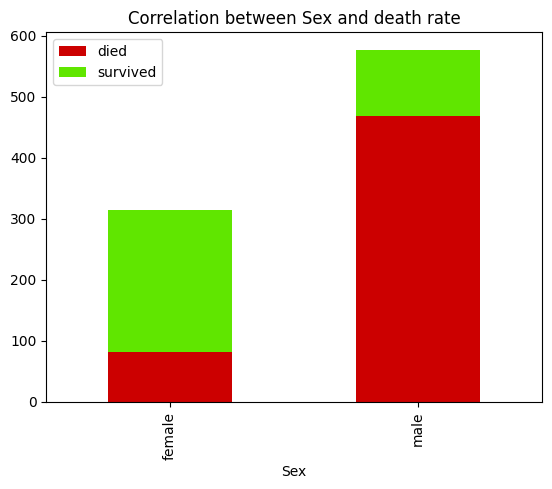

In [221]:
# analyse passenger sex and it's correlation to death rate 
gender_groups = titanic_df.groupby(['Sex', "Survived"])

combined_group_counts = gender_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between sex and absolute deaths")

We can definetely see that women were prioritized during evacuation, resulting in a much lower death rate than men. Furthermore you can tell, that in total there were much more male passengers on the titanic than females. But there were only around 100 surviving males, but around 200 surviving females.  

Text(0.5, 1.0, 'Correlation between Age and death rate')

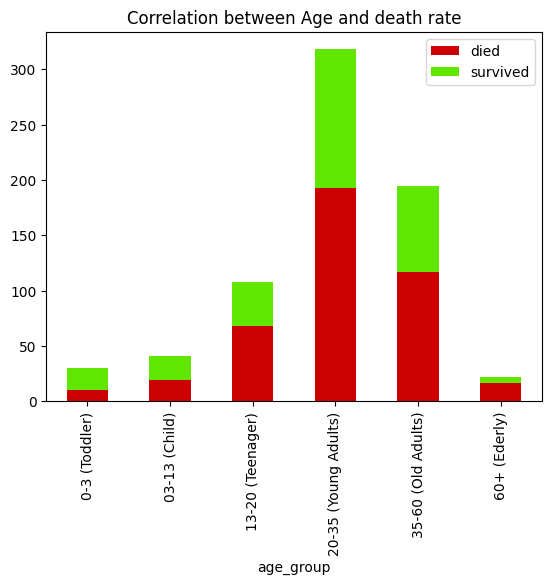

In [189]:
# analyse age and it's correlation to death

age_groups = titanic_df.groupby(['Age', "Survived"])
combined_group_counts = age_groups.count()["PassengerId"].unstack()

combined_group_counts["age_group"] = "" #create new column
# grouping the passengers by age
combined_group_counts.loc[combined_group_counts.index <= 3 , "age_group"] = "0-3 (Toddler)"
combined_group_counts.loc[combined_group_counts.index > 3, "age_group"] = "03-13 (Child)"
combined_group_counts.loc[combined_group_counts.index > 13, "age_group"] = "13-20 (Teenager)"
combined_group_counts.loc[combined_group_counts.index > 20, "age_group"] = "20-35 (Young Adults)"
combined_group_counts.loc[combined_group_counts.index > 35, "age_group"] = "35-60 (Old Adults)"
combined_group_counts.loc[combined_group_counts.index > 60, "age_group"] = "60+ (Ederly)"
combined_group_counts.loc[combined_group_counts.index > 150, "age_group"] = "Probably_Dead_lol"

groups_survival_rates = combined_group_counts.groupby(["age_group"]).sum()

combined_group_counts.reindex(combined_group_counts["age_group"])
combined_group_counts = age_groups.count()["PassengerId"].unstack()


fig, ax = plt.subplots()

groups_survival_rates.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])

plt.title("Correlation between age and total deaths")

First of all, one can see the age distribution on the ship. Young adults were the most prominent group, while childs, toddlers and elderly people were a lot less present on the titanic. Second one can see, that elderly people were a lot more likely to die than toddlers and childs. Additionally we should take this analysis whith a grain of salt, since it depicts only around 30 toddlers for example in the dataset, which statistically may not be enough to find significant correlations. 

Text(0.5, 1.0, 'Correlation between Class and death rate')

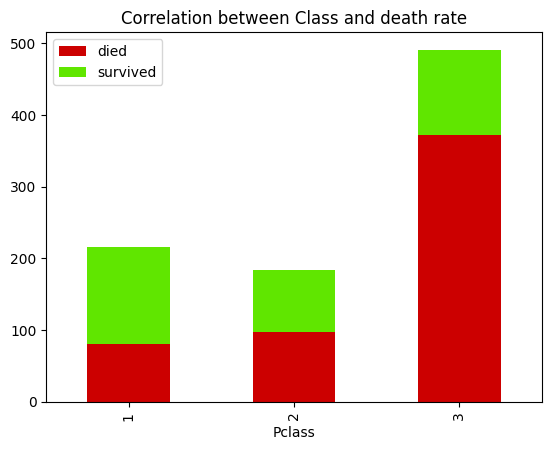

In [200]:
# analyse Passenger class and it's correlations
class_groups = titanic_df.groupby(['Pclass', "Survived"])

combined_group_counts = class_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between class and total deaths")

The data shows the class distribution. Most of the passengers traveled in the third class. It also shows that passengers traveling in the first class were more likely to survive the sinking than passengers in the second and third class.  

Text(0.5, 1.0, 'Correlation between city embarked and total deaths')

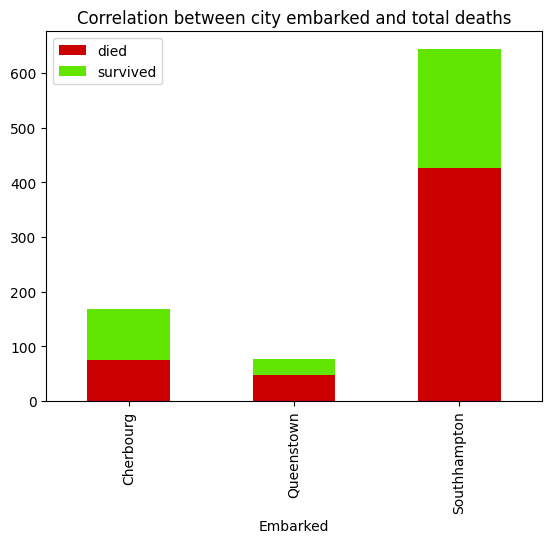

In [4]:
# analyse Passenger embarked and it's correlations
embarked_groups = titanic_df.groupby(['Embarked', "Survived"])

combined_group_counts = embarked_groups.count()["PassengerId"].unstack()
combined_group_counts.rename(index={'C':'Cherbourg'}, inplace=True)
combined_group_counts.rename(index={'Q':'Queenstown'}, inplace=True)
combined_group_counts.rename(index={'S':'Southhampton'}, inplace=True)


fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between city embarked and total deaths")

Text(0.5, 1.0, 'Correlation between Class and death rate')

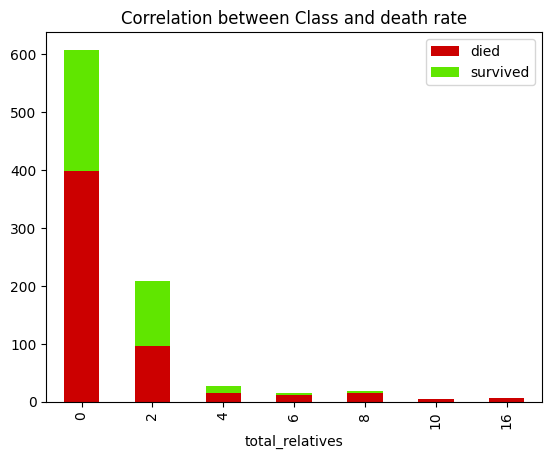

In [5]:
# analyse relatives and it's correlations
titanic_df["total_relatives"] = titanic_df["SibSp"] + titanic_df["Parch"]
relative_groups = titanic_df.groupby(['total_relatives', "Survived"])

combined_group_counts = relative_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between amount of relatives and total deaths")

This graph shows, that the data for people traveling with 4 or more relatives is statistically mostly insignificant due to it's low amount of data points. 
It also shows, that the survival rate increased if a passenger 